In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import sns as sns

experiment_names = {
    'horizon': './logs/experiment_horizon_electricity.log',
    'num_nodes': './logs/experiment_dimension_electricity.log',
    'new_ds_walmart': './logs/new_ds_walmart.log',
    'rossman2': './logs/new_ds_rossman_2.log'
}
ex_name = 'rossman2'
with open(experiment_names[ex_name], 'r') as file:
    data_str = file.read().replace("'",'"')[:-2]
    data = pd.read_json(f"[{data_str}]",)


In [55]:
df = data
df = df[df['type']!= 'loss']
df = df[df['type']!= 'final_valid']
df = df[df['epoch']>= 1]
df = df[df['horizon']>= 1]
df.loc[df['valid_rse']>-1, 'type'] = 'valid'
df.drop_duplicates(inplace=True)
print(df.keys())
df = df[df['type']!= 'loss']
del df["iter"], df["loss"]
df_long = pd.melt(df,id_vars=['name','type', 'epoch','horizon','num_nodes'],value_vars=['train_rse', 'train_rae', 'train_corr', 'valid_rse', 'valid_rae', 'valid_corr', 'test_rse', 'test_rae', 'test_corr'])

df_long[['data_type','metric']] = df_long['variable'].str.split('_',expand=True)

df_long = df_long[df_long['value'].notna()]
#df.pivot(index='patient', columns='obs', values='score')
del df_long["data_type"], df_long["variable"]
df_wide = df_long.pivot(index=['name','type','epoch','horizon','num_nodes'], columns='metric', values='value').reset_index()


Index(['name', 'type', 'horizon', 'num_nodes', 'epoch', 'iter', 'loss', 'time',
       'train_loss', 'train_rse', 'train_rae', 'train_corr', 'valid_rse',
       'valid_rae', 'valid_corr', 'test_rse', 'test_rae', 'test_corr'],
      dtype='object')


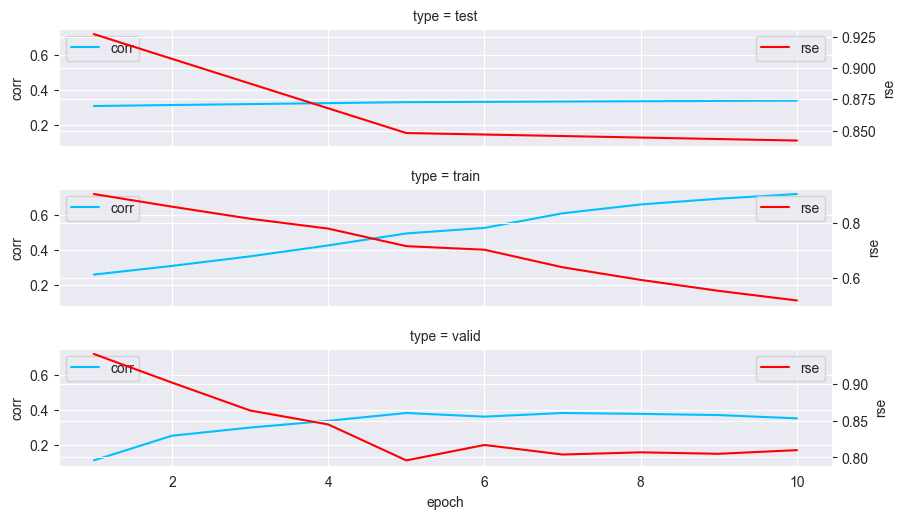

In [56]:
import seaborn as sns
x_axis = 'epoch'

g = sns.FacetGrid(df_wide, row="type",height=1.7, aspect=5)
for name in g.axes_dict:
    sub_plot =g.axes_dict[name]
    sns.lineplot(df_wide.loc[df_wide['type']==name],x=x_axis,y='corr',color='deepskyblue',ax = sub_plot, label="corr")
    # sub_plot.set_xscale('log', base=2)
    sub_plot.legend(loc="upper left")
    ax2 = sub_plot.axes.twinx()
    # ax2.set_xscale('log', base=2)
    sns.lineplot(df_wide.loc[df_wide['type']==name],x=x_axis,y='rse',color='red',ax = ax2, label="rse")
    ax2.legend(loc="upper right")

g.savefig(f"./images/experiment_{ex_name}.png")
